In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

In [2]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

Task 1: Complete the function u_initial so that it returns a NumPy array with the initial conditions specified above.

In [3]:
nx = 81
nt = 70
dx = 4.0/(nx-1)

In [4]:
def u_initial(nx):
    
    u = numpy.zeros(nx) #set the entire array to zero
    u[:(nx-1)*2/4] = 1 #set the second half of the array equal to 0
    
    return u

In [5]:
#u = u_initial(nx)
#print(u)

In [6]:
computeF = lambda u: (u/2)**2

Task 2: What does computeF do?

In [7]:
#lambda allows for you to plug in a value for u using computeF
#computeF(input)

Task 3: Complete the maccormack function below using array operations

In [8]:
def maccormack (u, nt, dt, dx):
    un = numpy.zeros((nt, len(u)))
    un[:] = u.copy()
    ustar = u.copy()
    
    for t in range(1, nt):
       
        F = computeF(u)
        
        ustar[:-1] = u[:-1] - dt/dx*(F[1:]-F[:-1])
        
        Fstar = computeF(ustar)
        
        un[t,1:] = 0.5 *( u[1:] + ustar[1:] - dt/dx*(Fstar[1:]-Fstar[:-1]))
        
        u = un[t].copy()
        
    return un

CFL = 1

In [9]:
def animate(data):
    x = numpy.linspace(0, 4, nx)
    y = data
    line.set_data(x,y)
    return line,


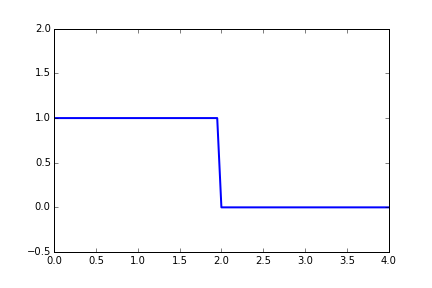
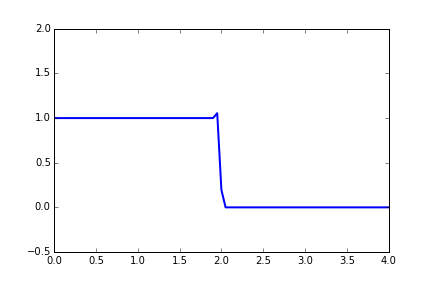
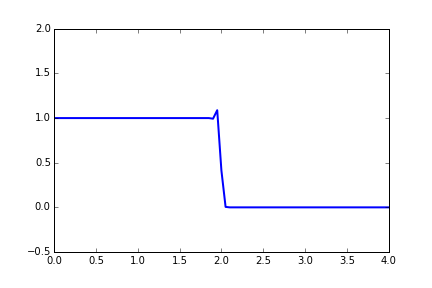
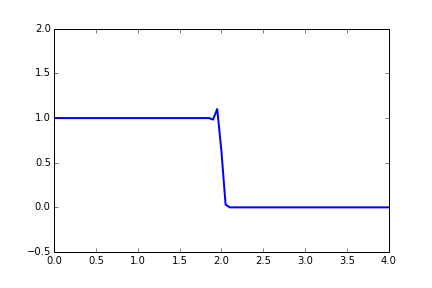
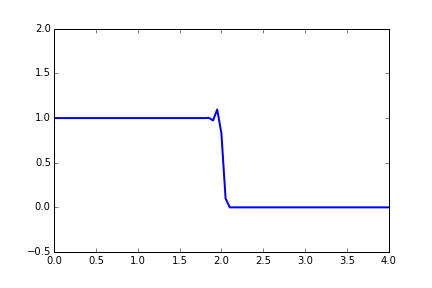
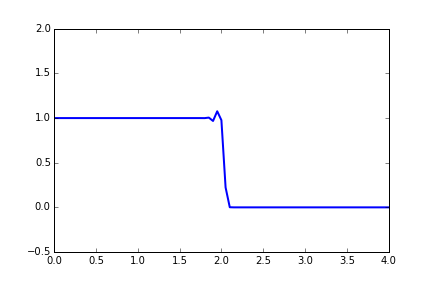
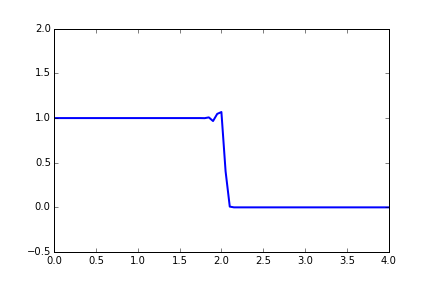
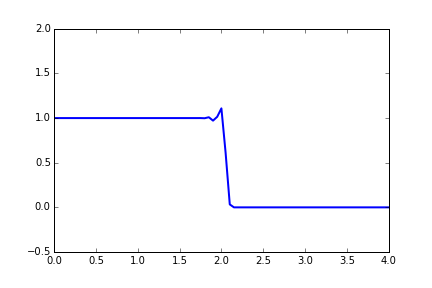
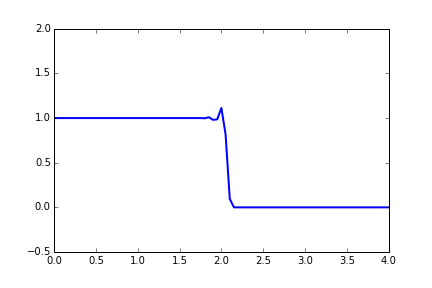
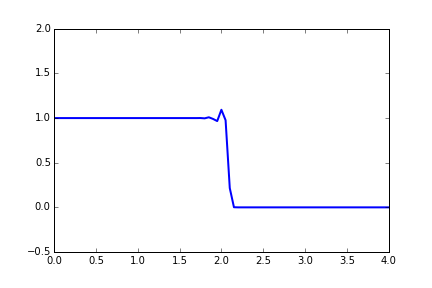
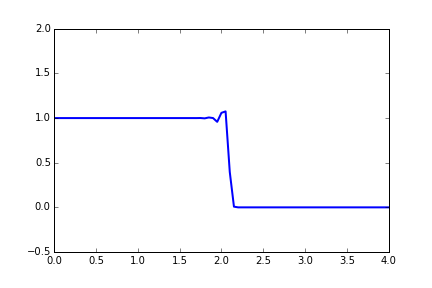
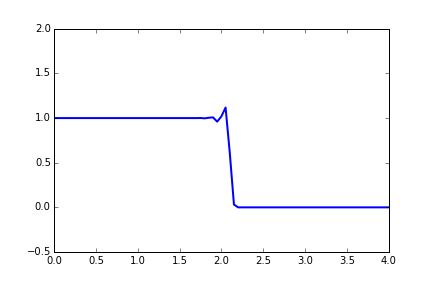
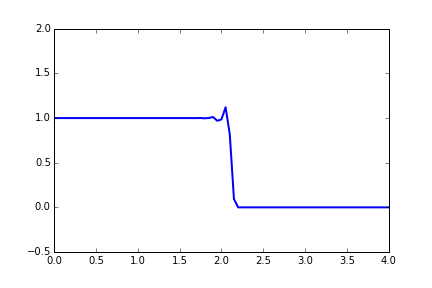
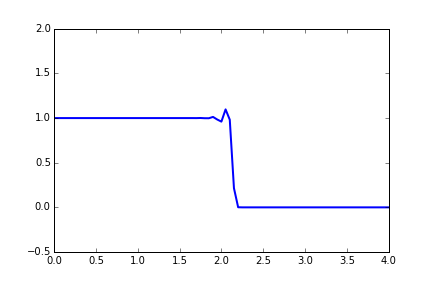
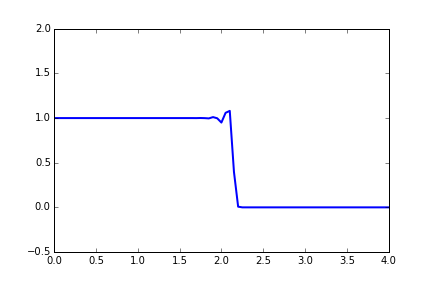
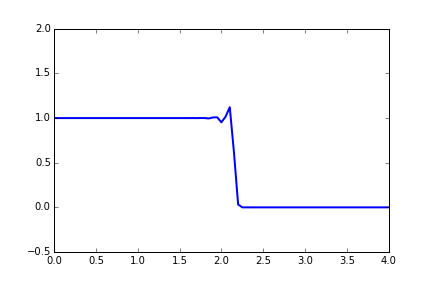
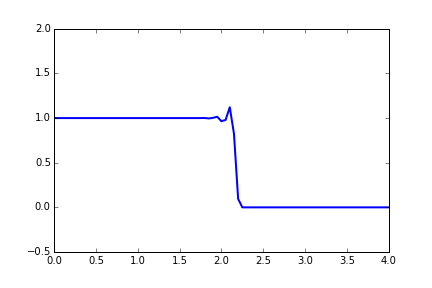
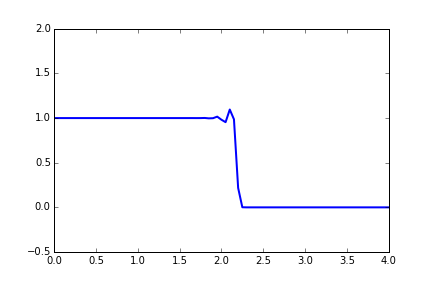
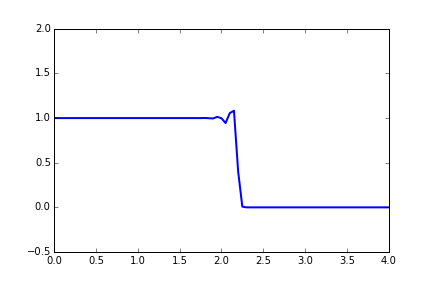
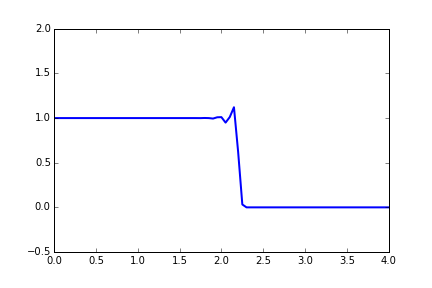
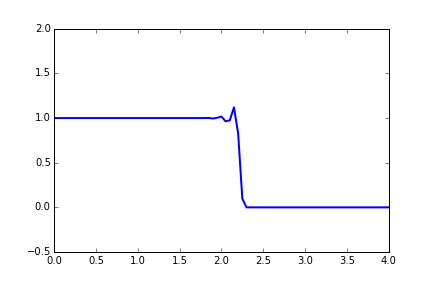
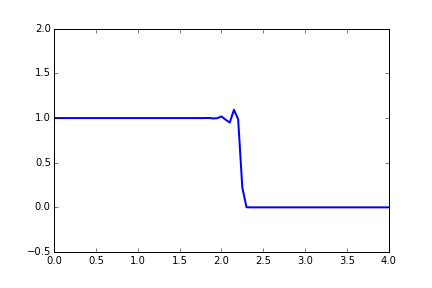
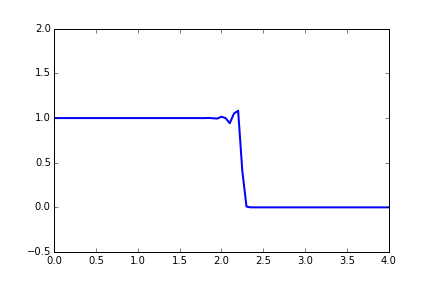
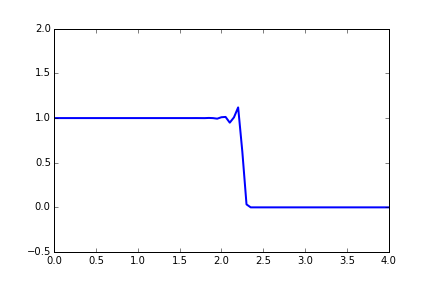
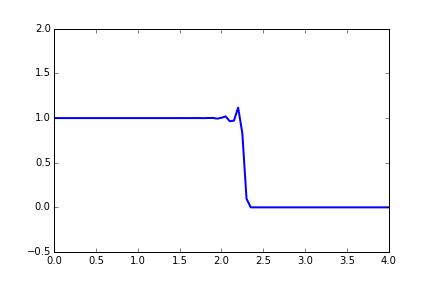
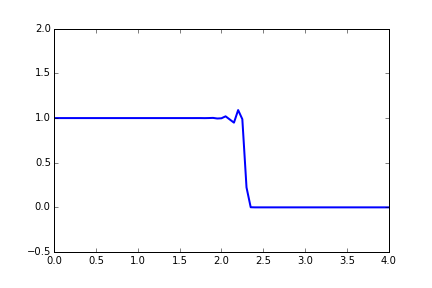
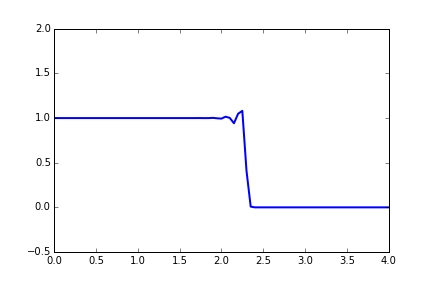
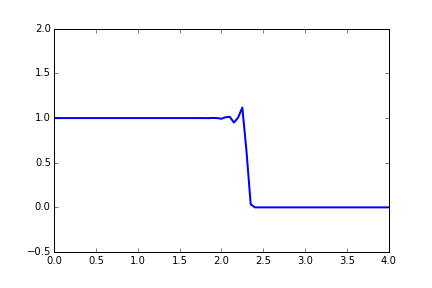
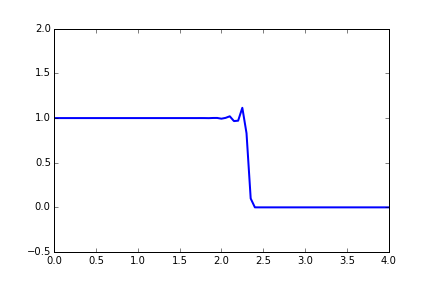
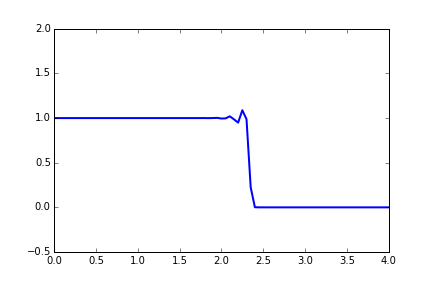
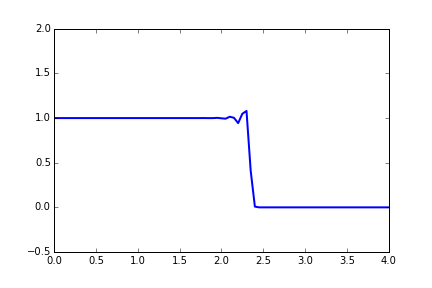
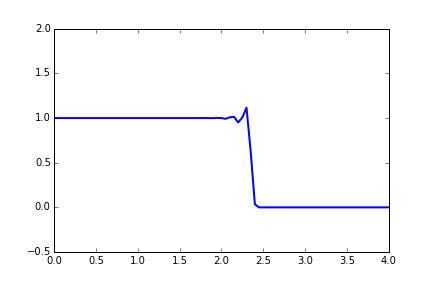
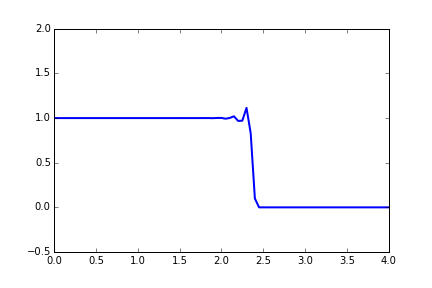
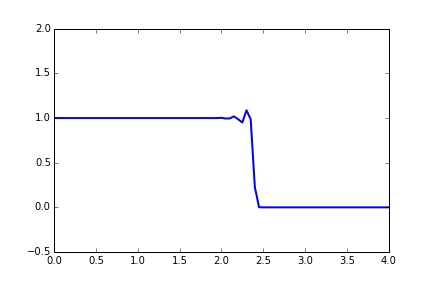
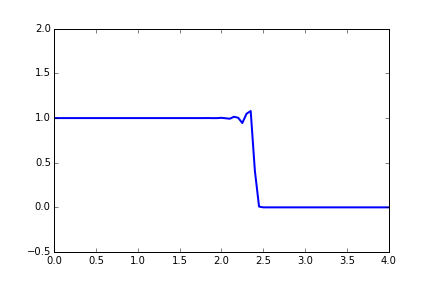
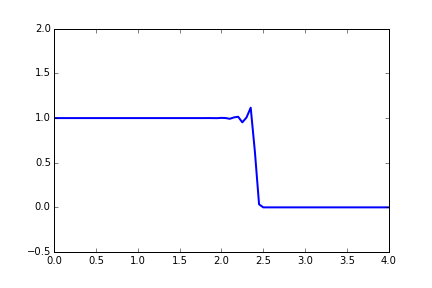
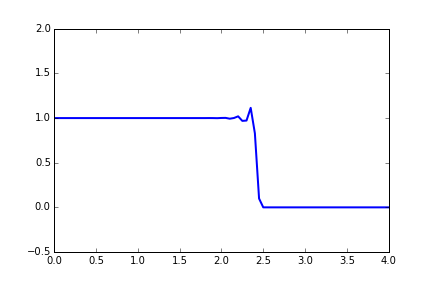
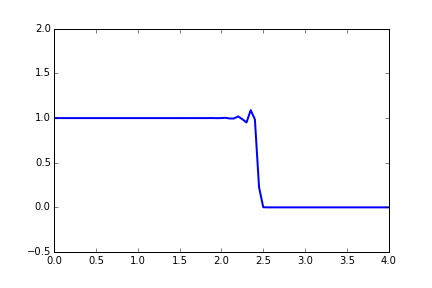
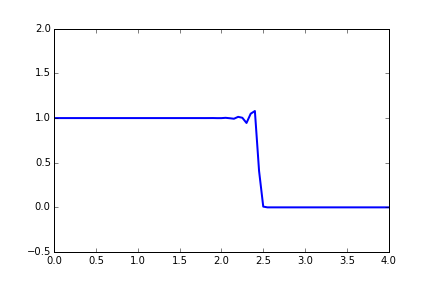
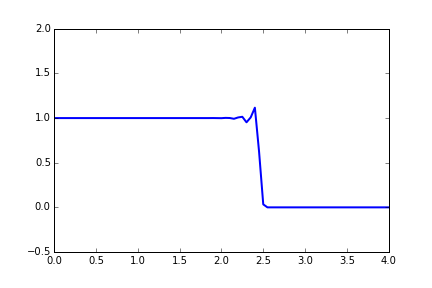
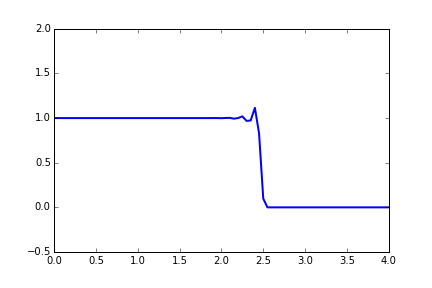
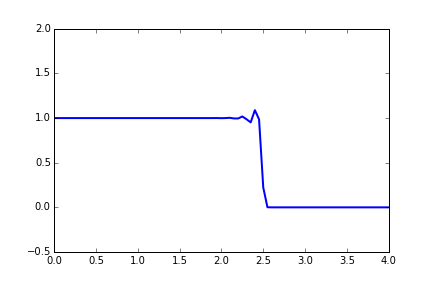
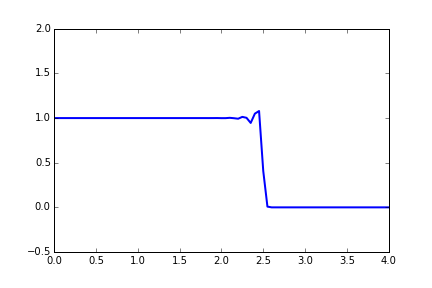
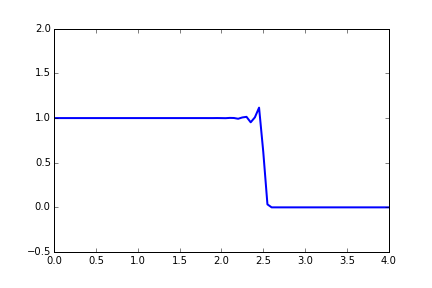
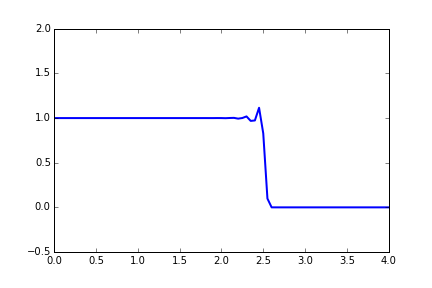
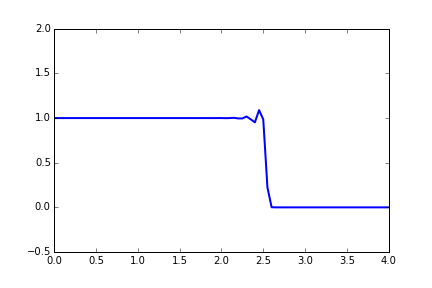
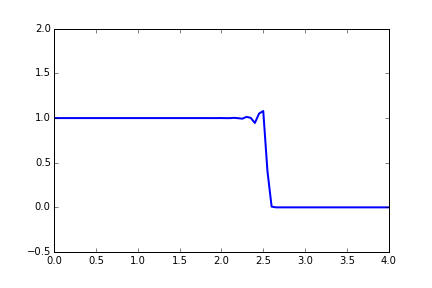
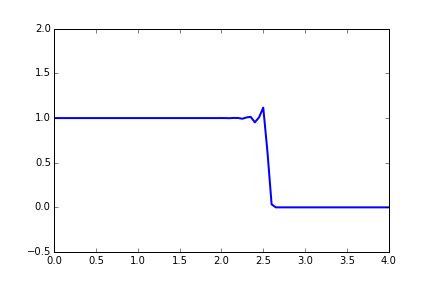
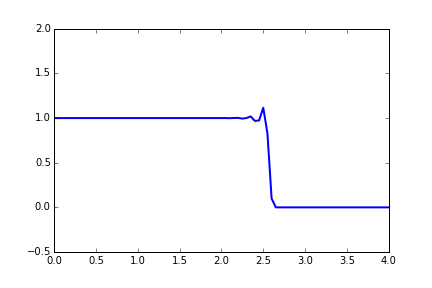
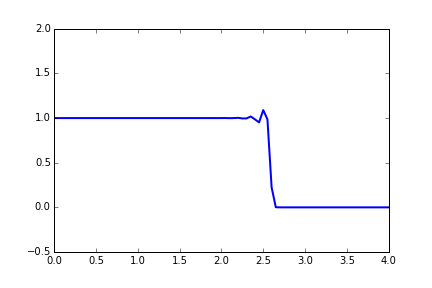
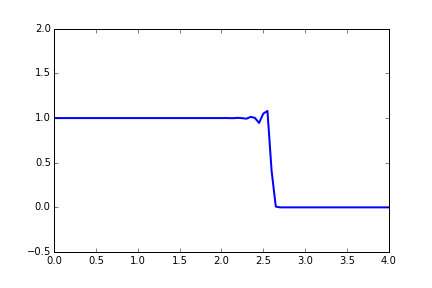
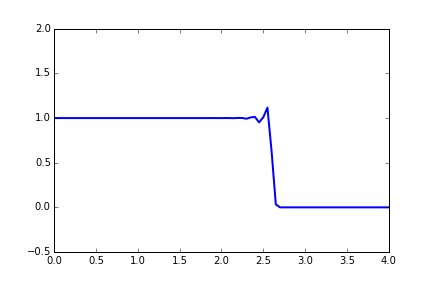
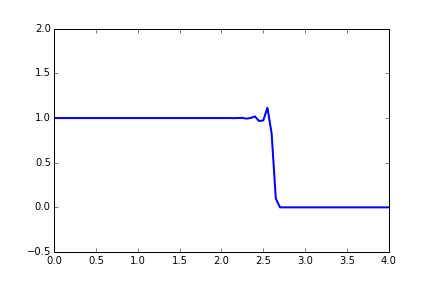
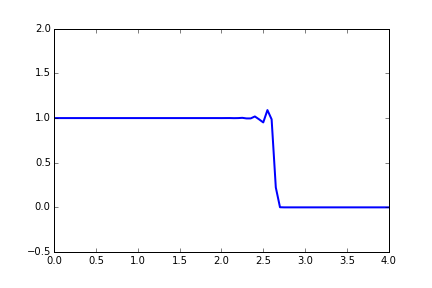
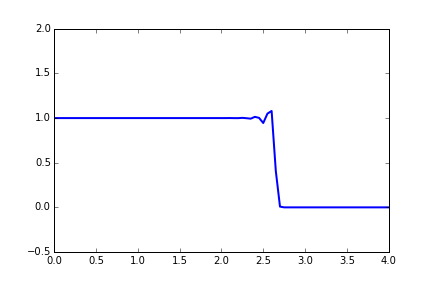
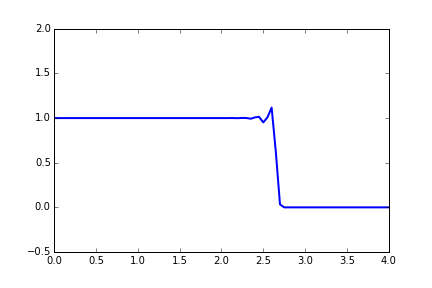
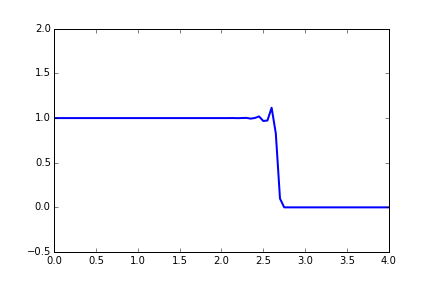
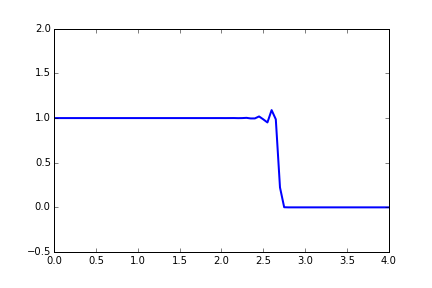
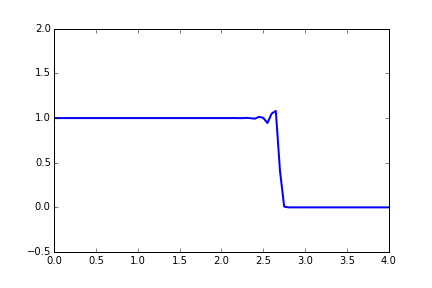
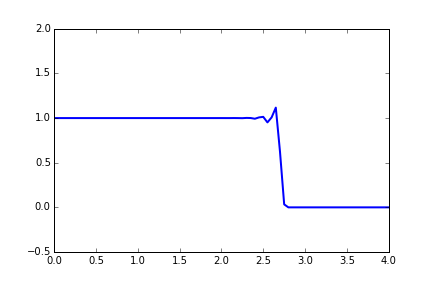
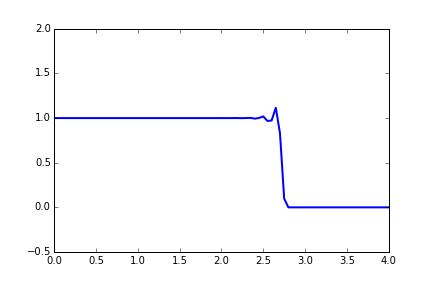
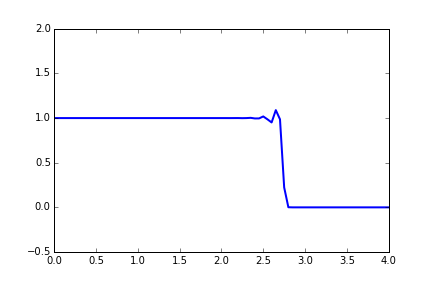
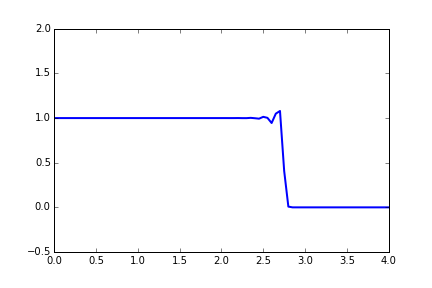
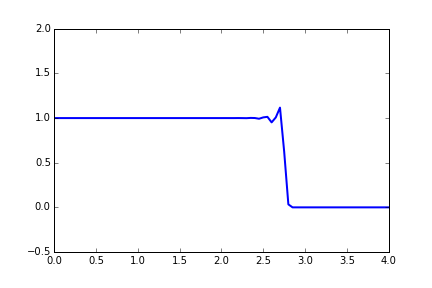
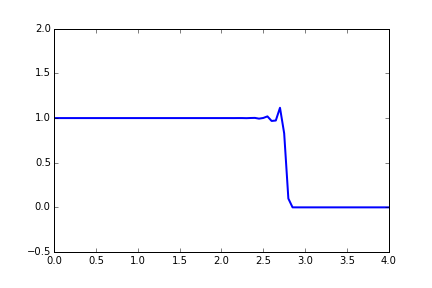
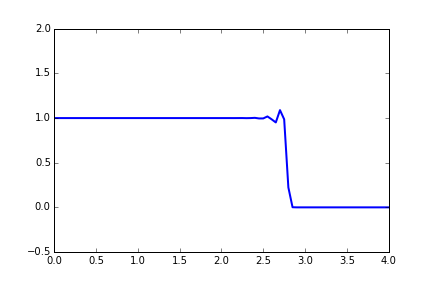
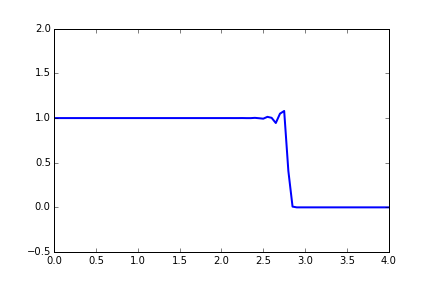
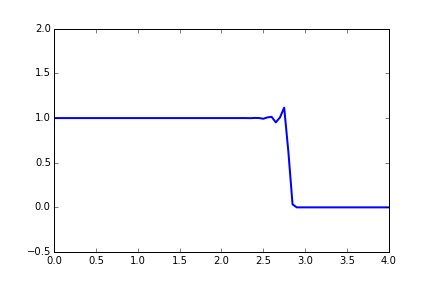
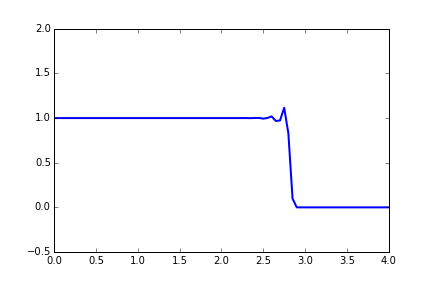
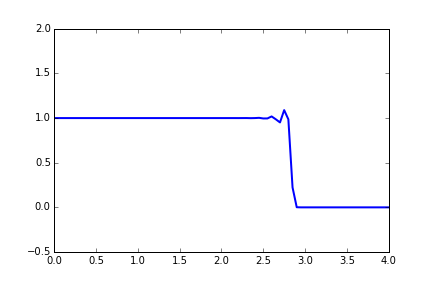

In [10]:
u = u_initial(nx)
sigma = 1
dt = sigma*dx

un = maccormack(u, nt, dt, dx)

fig = plt.figure();
ax = plt.axes(xlim=(0,4),ylim=(-.5,2));
line, = ax.plot([],[], lw =2);

anim = animation.FuncAnimation(fig, animate, frames=un, interval =50)
display_animation(anim, default_mode='once')

Task 4: Add this term to the predictor step of your MacCormack function above and experiment with values of epsilon from 0 to 1. Try to find a value of episilon that damps out the oscillations without messing up the rest of the solution too much.

In [15]:
def maccormack_epsilon (u, nt, dt, dx):
    E = 0.2
    un = numpy.zeros((nt, len(u)))
    un[:] = u.copy()
    ustar = u.copy()
    
    for t in range(1, nt):
       
        F = computeF(u)
        
        ustar[1:-1] = u[1:-1] - dt/dx*(F[2:]-F[1:-1]) + E*(u[2:] - 2*u[1:-1] + u[:-2])
        
        Fstar = computeF(ustar)
        
        un[t,1:] = 0.5 *( u[1:] + ustar[1:] - dt/dx*(Fstar[1:]-Fstar[:-1]))
        
        u = un[t].copy()
        
    return un


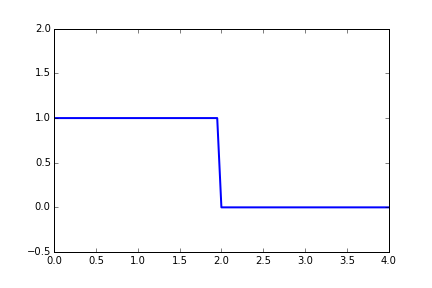
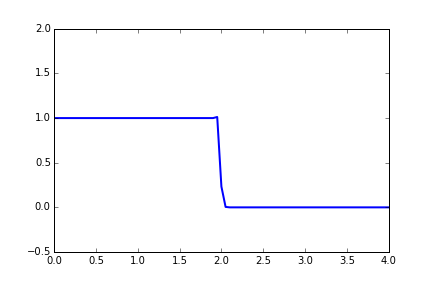
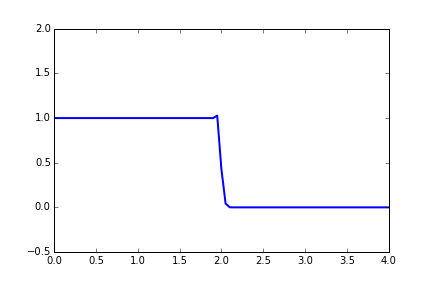
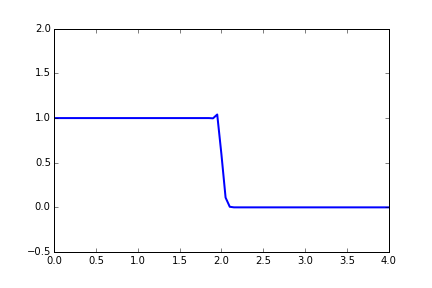
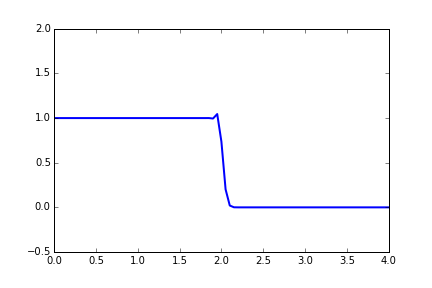
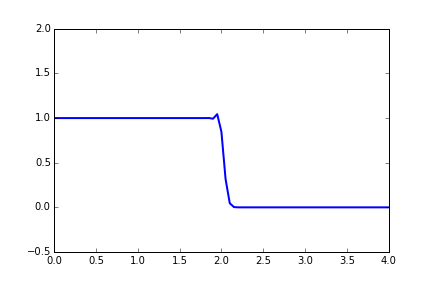
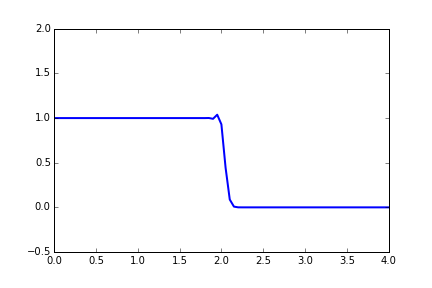
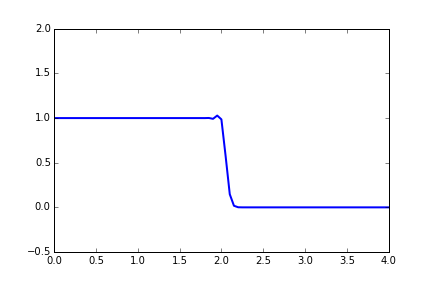
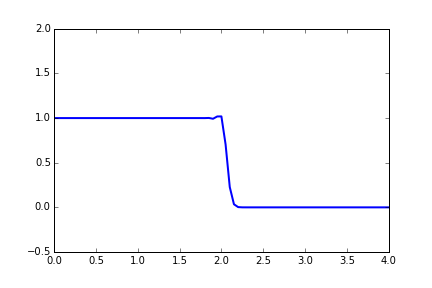
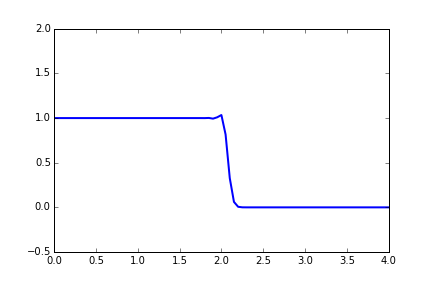
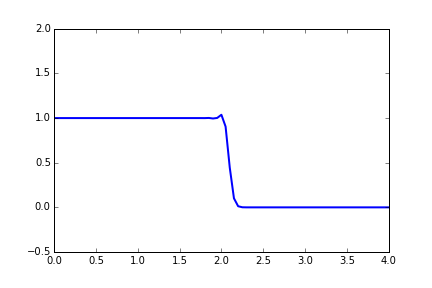
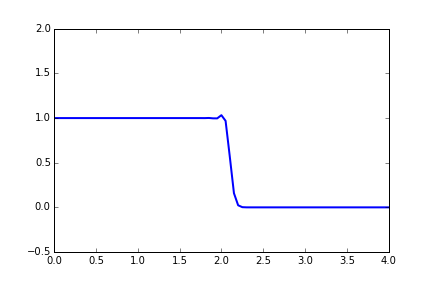
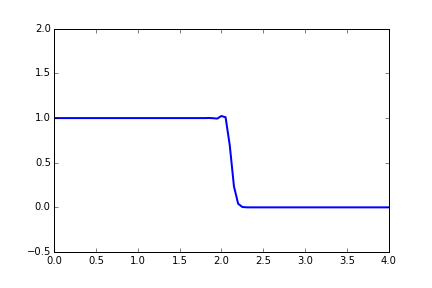
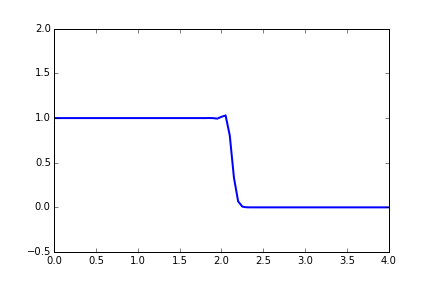
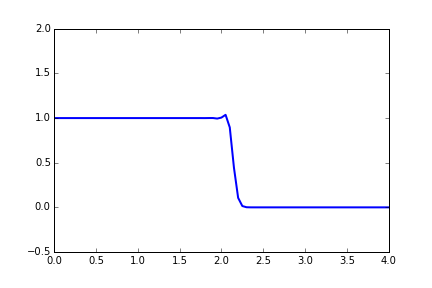
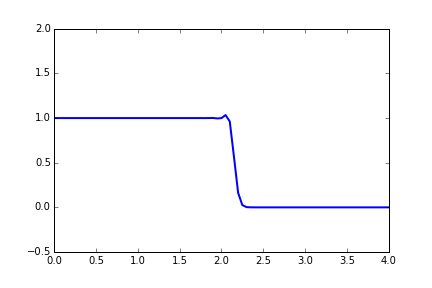
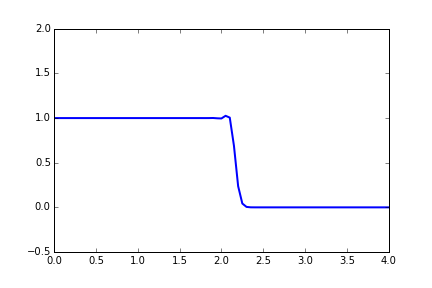
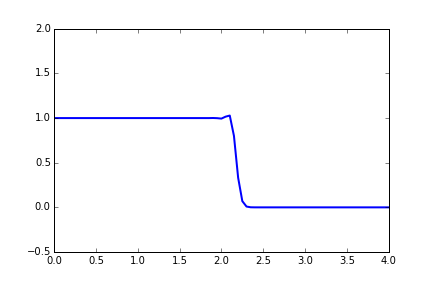
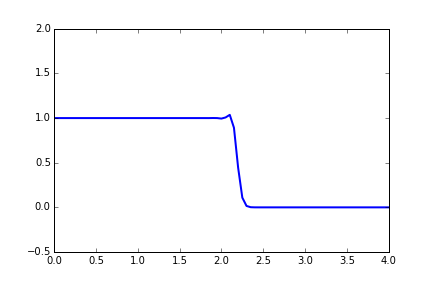
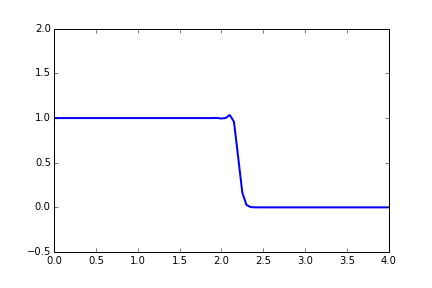
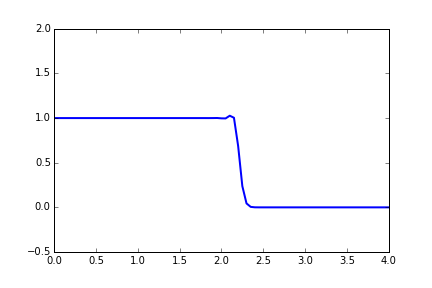
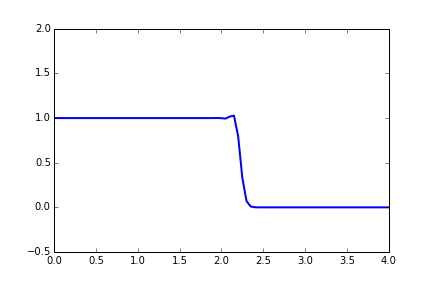
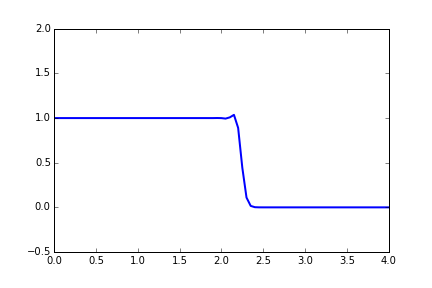
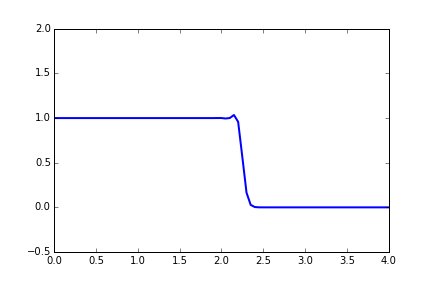
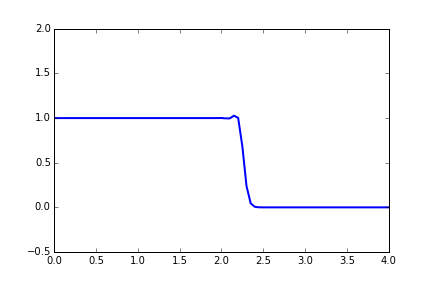
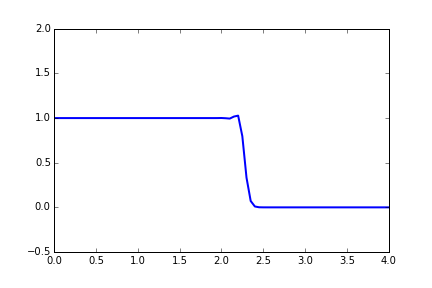
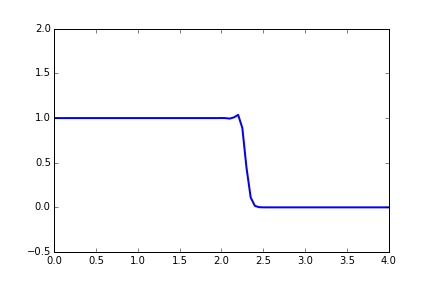
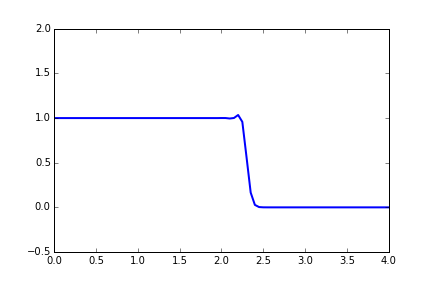
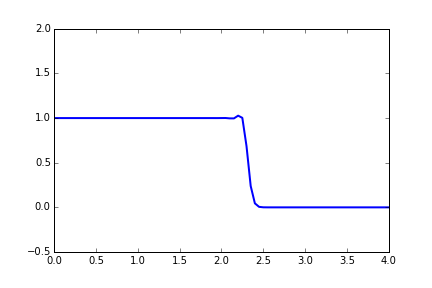
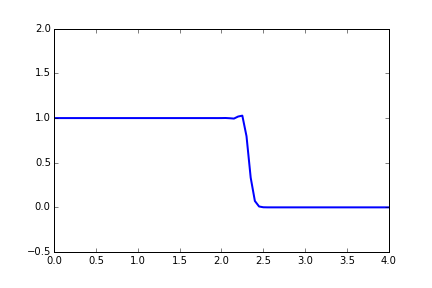
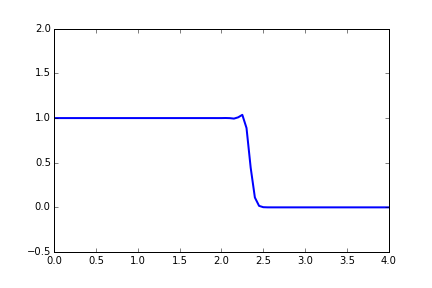
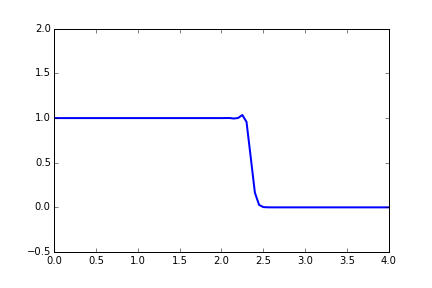
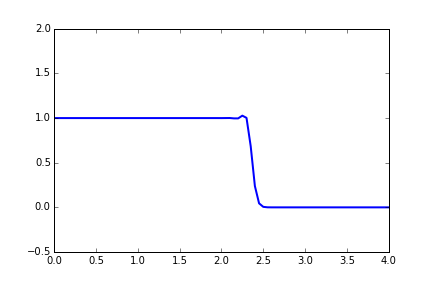
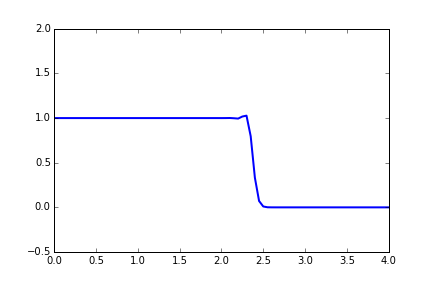
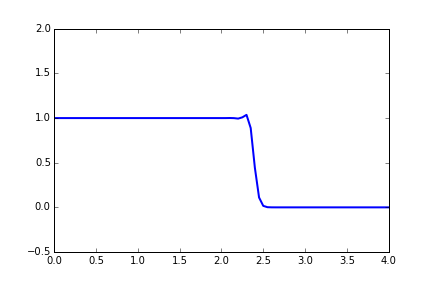
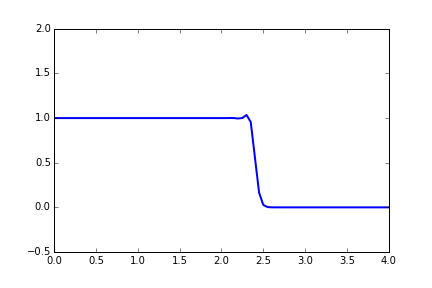
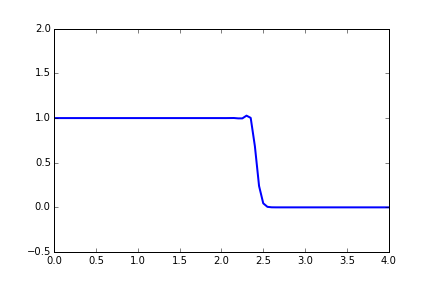
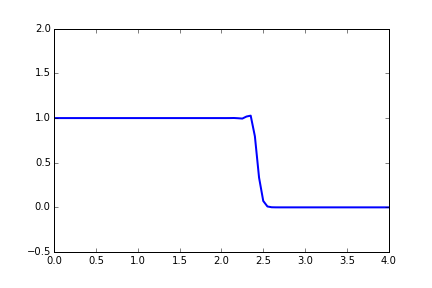
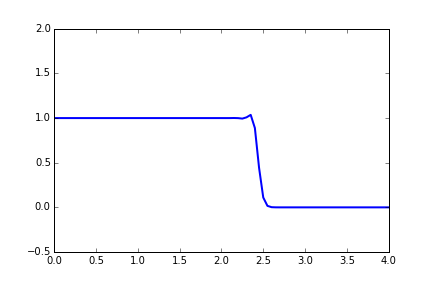
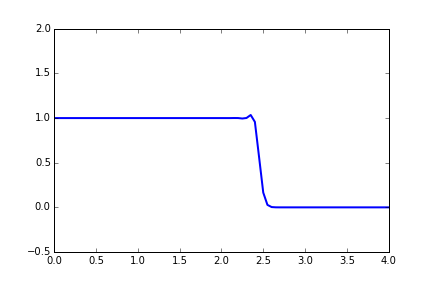
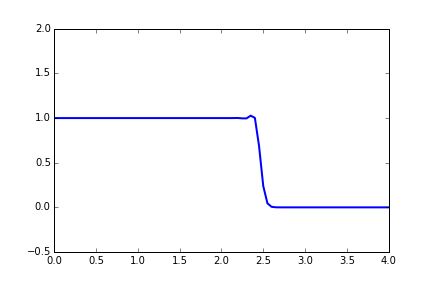
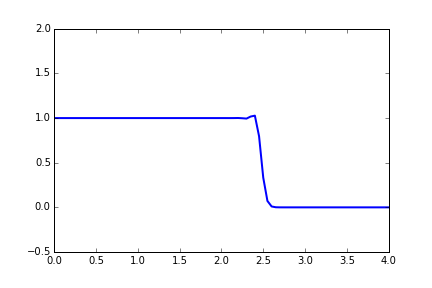
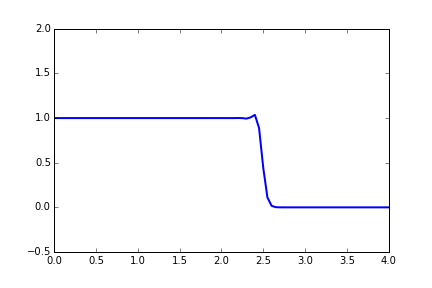
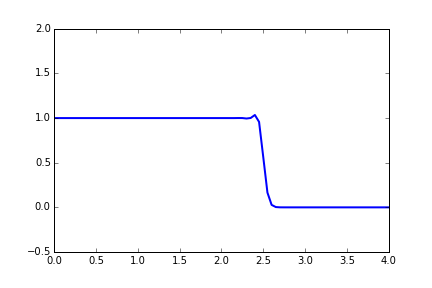
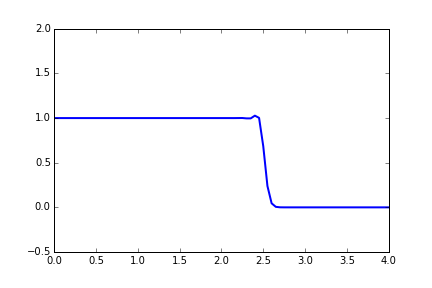
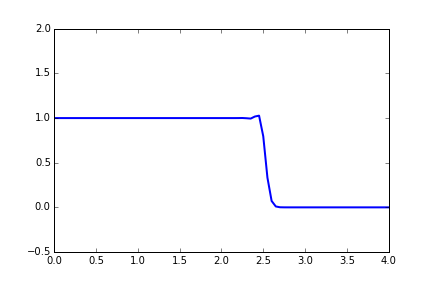
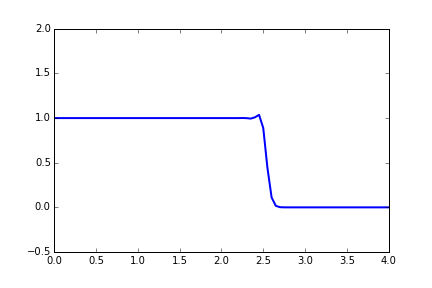
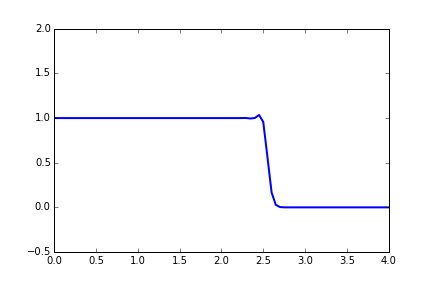
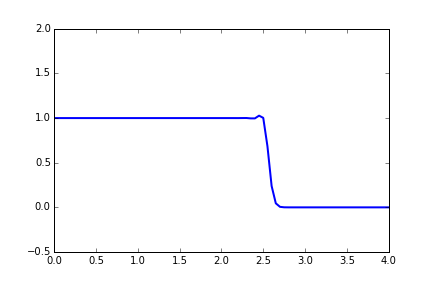
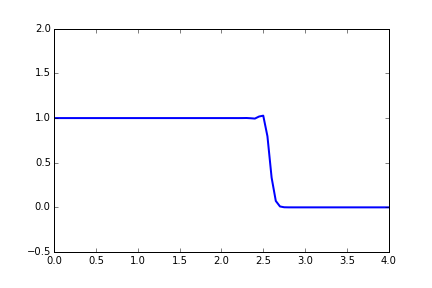
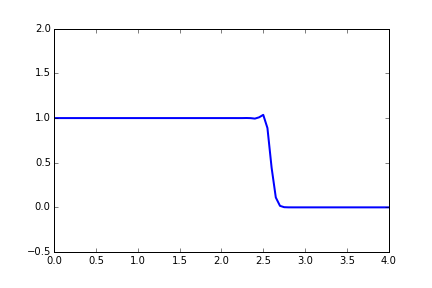
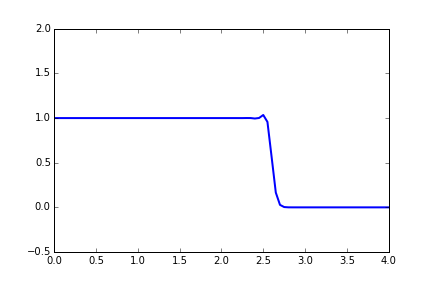
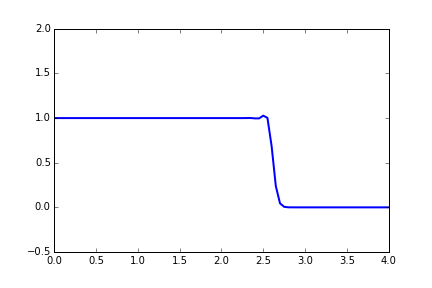
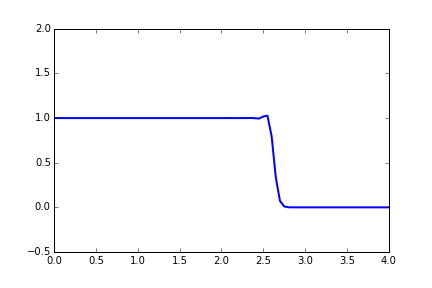
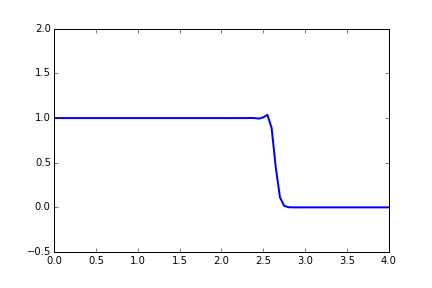
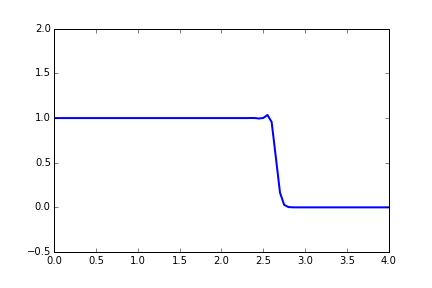
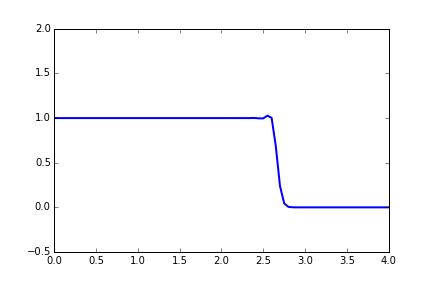
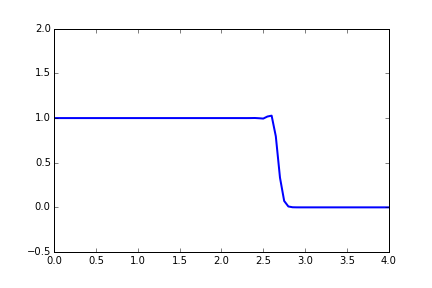
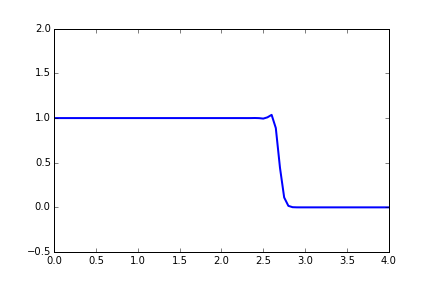
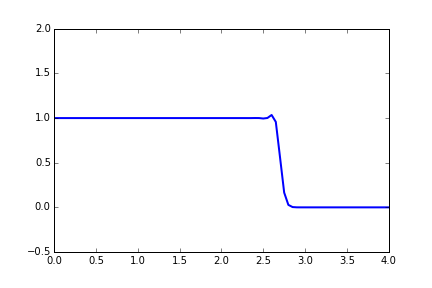
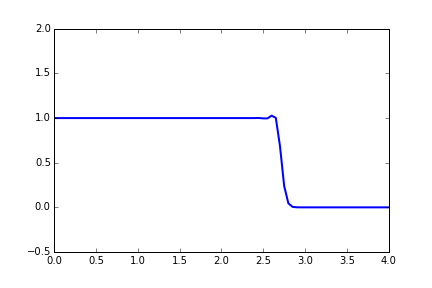
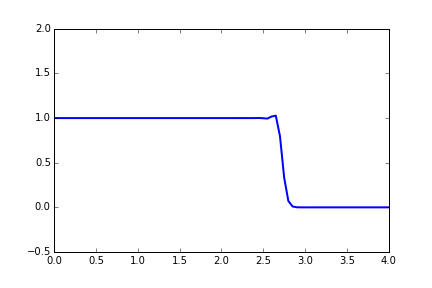
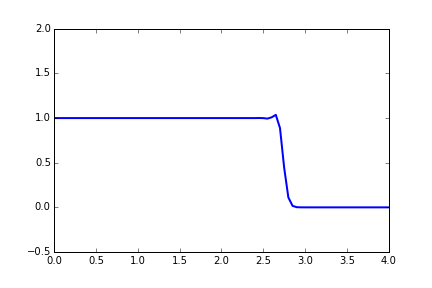
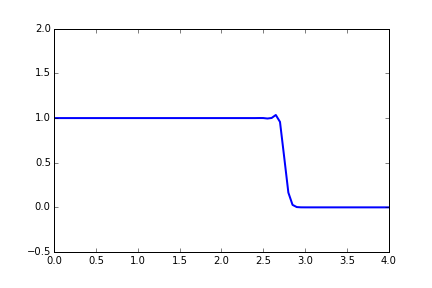
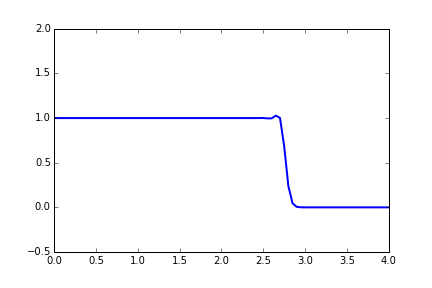
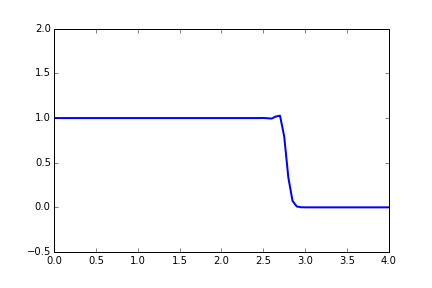
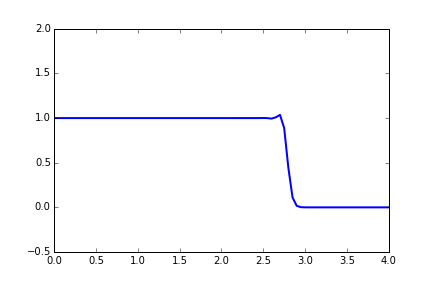
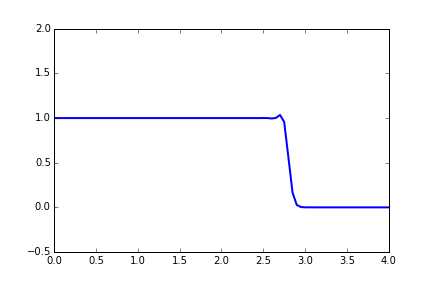
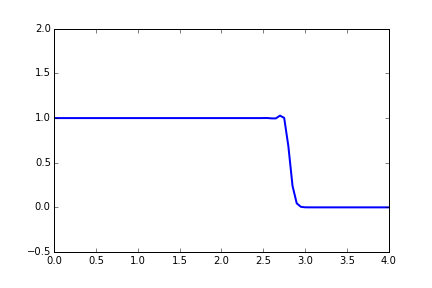
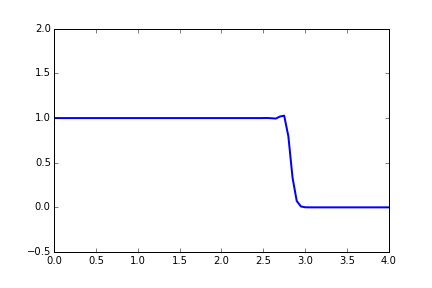

In [16]:
u = u_initial(nx)
sigma = 1
dt = sigma*dx

un = maccormack_epsilon(u, nt, dt, dx)

anim = animation.FuncAnimation(fig, animate, frames=un, interval =50)
display_animation(anim, default_mode='once')